In [1]:
NARR_temp_data <- read.csv(file='../data/NOAA_NARR_weather_data/california_box_air_sfc_2015_one_hour.csv', header=TRUE, sep=",")

In [2]:
head(NARR_temp_data, n=10)

time,lat,lon,air
<fct>,<dbl>,<dbl>,<dbl>
2015-03-23 18:00:00,31.63322,-125.3449,290.2324
2015-03-23 18:00:00,31.90358,-125.4247,290.2324
2015-03-23 18:00:00,31.70029,-125.0272,290.2324
2015-03-23 18:00:00,31.97103,-125.1057,290.0449
2015-03-23 18:00:00,32.24205,-125.1849,289.9199
2015-03-23 18:00:00,32.51336,-125.2648,289.9199
2015-03-23 18:00:00,32.78494,-125.3453,289.7324
2015-03-23 18:00:00,33.05679,-125.4266,289.6074
2015-03-23 18:00:00,31.76624,-124.7088,290.1074


In [3]:
library(akima)
library(ggplot2)

lat_start = 31.52
lon_start = -125.48
lat_end = 43.0
lon_end = -113.131

gridint <- 200

In [4]:
gridded_data <- with(NARR_temp_data, interp(x = lon, y = lat, z = air, linear = FALSE, extrap = FALSE,
                      xo=seq(lon_start, lon_end, length=gridint), 
                      yo=seq(lat_start, lat_end, length=gridint)))

gridded_data <- as.data.frame(interp2xyz(gridded_data))

In [5]:
head(gridded_data, n=5)

x,y,z
<dbl>,<dbl>,<dbl>
-125.4800,31.52,NA
-125.4179,31.52,NA
-125.3559,31.52,NA
-125.2938,31.52,NA
-125.2318,31.52,NA


In [6]:
states <- map_data("state")
california <- subset(states, region == "california")
counties <- map_data("county")
ca_county <- subset(counties, region == "california")
head(california, n=5)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
667,-120.0060,42.00927,4,667,california,NA
668,-120.0060,41.20139,4,668,california,NA
669,-120.0060,39.70024,4,669,california,NA
670,-119.9946,39.44241,4,670,california,NA
671,-120.0060,39.31636,4,671,california,NA


Loading required package: viridisLite


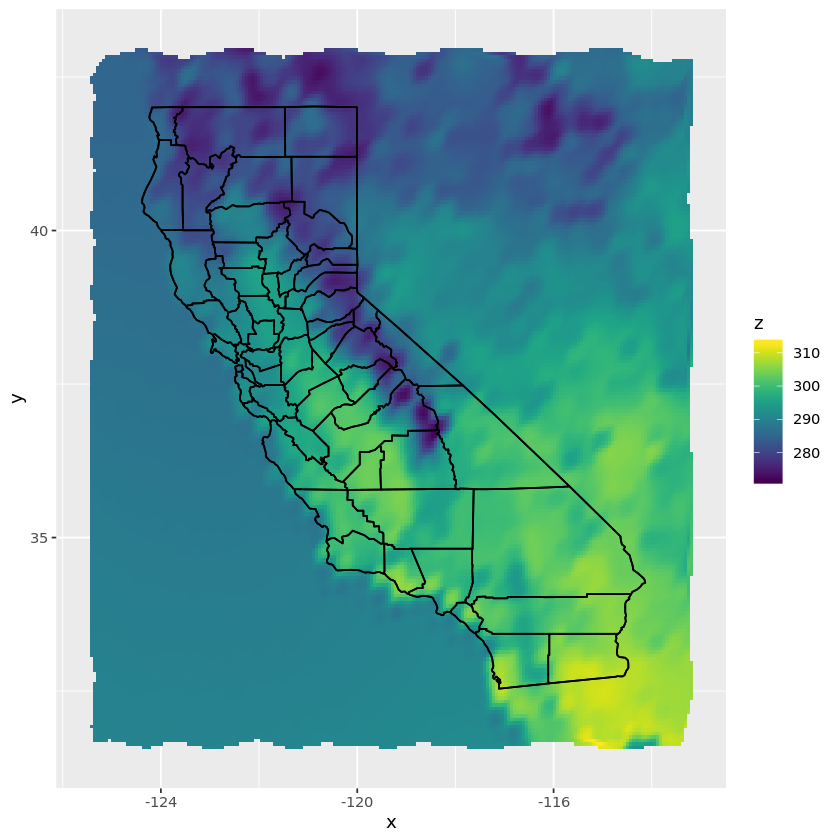

In [9]:
library(viridis)
ggplot() + geom_tile(aes(x = x, y = y, fill = z), data = gridded_data) + 
    scale_fill_viridis(na.value = "transparent") + 
    geom_polygon(data = california, 
                 mapping = aes(x = long, y = lat, group = group),
                 color = "black",
                 fill = NA) +
    geom_polygon(data = ca_county,
                 mapping = aes(x = long, y = lat, group = group),
                 fill = NA, 
                 color = "black")